# WeatherPy -Sanjay Mamidi
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
* Added By Sanjay - Humidity is close to 100% in most cities close to the equator with less than 100% humidity futher away. However there are many cities with 100% humidity even if they are futher away from the equator. This may be due thier promixty to large bodies of water or sea shore. This would be a reason of futher exploration.
* Depending on when this code is run there is some outlier data collected wrt to Humidity. Humidity exceeds 100% and approaches >200%. This is obviously impossible. Rerunning this data solves the problem or putting in some code to ignore this data is also a solution which has been implemented below.
---

#### Note
* 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
############## Remeber to import key rather than hardcode
import api_keys
# api_key ='Insert Key Here'
# print (api_keys.api_key)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
Cities = []
CityNumber =[]
lat = []
lng = []
Country = []
MaxTemp= [] 
Humidity = []
WindSpeed= [] 
Cloudiness= []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
print("Now Starting the call to Weather API")
for city in cities:
    print(f'Now Processing City: {city}')
    # Build query URL
    query_url = url + "appid=" + api_keys.api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Get the various parameters from the response
    try:
        print(f'Now Processing City: {weather_json["name"]}, CityId: {weather_json["id"]}')
        Cities.append(weather_json["name"])
        CityNumber.append(weather_json["id"])    
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        Country.append(weather_json["sys"]["country"])
        MaxTemp.append(weather_json["main"]["temp_max"])
        if (weather_json["main"]["humidity"] < 150) :
            Humidity.append(weather_json["main"]["humidity"])
        else :
            print(f'Error Humidiy Exceeds 150. Skipping City: {city}')   
        WindSpeed.append(weather_json["wind"]["speed"])
        Cloudiness.append(weather_json["clouds"]["all"])
    except Exception as ex:
        print(f'Error {ex} Skipping City: {city}')  
        continue

Now Starting the call to Weather API
Now Processing City: barawe
Error 'name' Skipping City: barawe
Now Processing City: puerto ayora
Now Processing City: Puerto Ayora, CityId: 3652764
Now Processing City: bredasdorp
Now Processing City: Bredasdorp, CityId: 1015776
Now Processing City: play cu
Error 'name' Skipping City: play cu
Now Processing City: nanortalik
Now Processing City: Nanortalik, CityId: 3421765
Now Processing City: bengkulu
Error 'name' Skipping City: bengkulu
Now Processing City: odweyne
Error 'name' Skipping City: odweyne
Now Processing City: rikitea
Now Processing City: Rikitea, CityId: 4030556
Now Processing City: faya
Now Processing City: Faya, CityId: 110690
Now Processing City: mys shmidta
Error 'name' Skipping City: mys shmidta
Now Processing City: garowe
Now Processing City: Garowe, CityId: 58933
Now Processing City: vaini
Now Processing City: Vaini, CityId: 1273574
Now Processing City: kodiak
Now Processing City: Kodiak, CityId: 4407665
Now Processing City: bakc

Now Processing City: Salalah, CityId: 286621
Now Processing City: ati
Now Processing City: herat
Now Processing City: Herat, CityId: 1140026
Now Processing City: one hundred mile house
Error 'name' Skipping City: one hundred mile house


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
weather_dict = {
    "city": Cities,
    "CityId":CityNumber, 
    "lat": lat,
    "lng": lng,
    "Country": Country,
    "Max Temp": MaxTemp,
    "Humidity": Humidity,
    "Wind Speed": WindSpeed,
    "Cloudiness": Cloudiness
}

In [45]:
weather_df = pd.DataFrame(weather_dict)
weather_df= weather_df.sort_values(by=["Humidity"])
display(weather_df)
# Export to CSV
output_data_file = open('cities.csv', 'w')
weather_df.to_csv(output_data_file,sep=',',index = False)
output_data_file.close()

,city,CityId,lat,lng,Country,Max Temp,Humidity,Wind Speed,Cloudiness
346,Karratha,6620339,-20.74,116.85,AU,102.36,12,11.10,0
525,Sivani,1256826,22.09,79.55,IN,90.30,19,4.16,0
257,Mandera,187896,3.94,41.86,ET,79.00,19,8.75,0
162,Constitucion,4011743,23.99,-104.67,MX,64.40,20,13.87,5
183,Alice Springs,2077895,-23.70,133.88,AU,87.80,20,11.41,0
194,ChengDe,2038087,40.97,117.93,CN,51.51,21,8.86,92
365,Harrai,1270286,22.61,79.22,IN,87.42,22,8.97,0
40,Broken Hill,2173911,-31.97,141.45,AU,86.00,22,18.34,0
533,Aswan,359792,24.09,32.90,EG,69.80,22,9.17,0
93,Ati,2436400,13.21,18.34,TD,71.13,24,7.40,0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

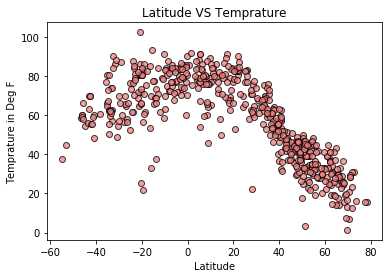

<Figure size 432x288 with 0 Axes>

In [48]:
plt.title("Latitude VS Temprature")
plt.scatter(weather_df["lat"], weather_df["Max Temp"], marker="o", facecolors="lightcoral", edgecolors="black",\
            alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Temprature in Deg F')
plt.show()
plt.savefig('LatVTemp.png')

#### Latitude vs. Humidity Plot

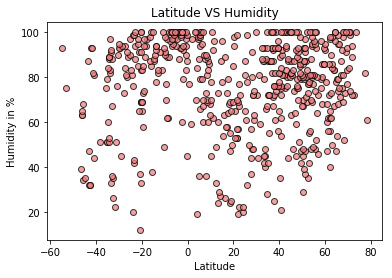

<Figure size 432x288 with 0 Axes>

In [49]:
plt.title("Latitude VS Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity in %')
plt.scatter(weather_df["lat"], weather_df["Humidity"], marker="o", facecolors="lightcoral", edgecolors="black",\
            alpha = 0.75)
plt.show()
plt.savefig('LatVHumidity.png')


#### Latitude vs. Cloudiness Plot

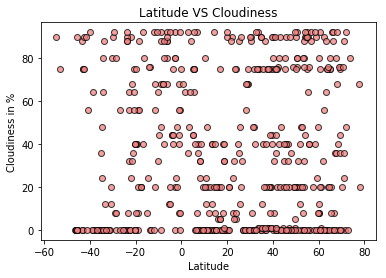

In [39]:
plt.title("Latitude VS Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness in %')
plt.scatter(weather_df["lat"], weather_df["Cloudiness"], marker="o", facecolors="lightcoral", edgecolors="black",\
            alpha = 0.75)
plt.show()
plt.savefig('LatVCloud.png')

#### Latitude vs. Wind Speed Plot

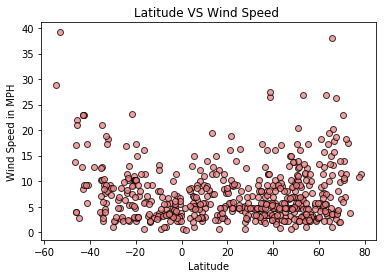

<Figure size 432x288 with 0 Axes>

In [51]:
plt.title("Latitude VS Wind Speed ")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in MPH')
plt.scatter(weather_df["lat"], weather_df["Wind Speed"], marker="o", facecolors="lightcoral", edgecolors="black",\
            alpha = 0.75)
plt.show()
plt.savefig('LatVWindSpeed.png')